In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from tqdm.notebook import trange, tqdm
from PIL import Image


In [ ]:
path = "/content/drive/MyDrive/age_gender.csv"

df = pd.read_csv(path)
import pandas as pd
  

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers 
import random
import numpy as np
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras import layers
from tensorflow.keras import regularizers

In [ ]:
 x_batch = np.zeros((23705, 48, 48, 1))
 for i in tqdm(range(1,23705)):
   image = np.array(df['pixels'][i].split(), 'float64')
   image = image.reshape(48, 48, 1) / 255.0
   x_batch[i] = image

In [ ]:
ethnicity_mapping = {0:"White", 1:"Black", 2:"Asian", 3:"Indian", 4:"Hispanic"}

In [ ]:
eth1 = df['ethnicity']
for i in range(5):
  eth1 = eth1.replace(i, ethnicity_mapping[i])
eth1   

0        Asian
1        Asian
2        Asian
3        Asian
4        Asian
         ...  
23700    White
23701    Black
23702    Asian
23703    Asian
23704    White
Name: ethnicity, Length: 23705, dtype: object

In [ ]:

eth = pd.get_dummies(eth1)
y = np.array(eth["White"]).reshape((23705,1))
for i in range(1,5):
  labels = eth[ethnicity_mapping[i]].to_numpy().reshape((23705,1))
  y = np.append(y,labels,axis=1)

y

array([[0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       ...,
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0]], dtype=uint8)

In [ ]:
optimizer = keras.optimizers.Adam(learning_rate=0.001)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_batch, y, test_size=0.1)

In [ ]:
model = keras.Sequential(
    [
        keras.Input(shape=(48,48,1)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu" ),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.BatchNormalization(),
     
        layers.Conv2D(64, kernel_size=(5, 5), activation="relu" ),
        layers.Conv2D(128, kernel_size=(3, 3), activation="relu" ),
        layers.MaxPooling2D(pool_size=(2, 2)),
        
        layers.BatchNormalization(),
     
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
         
        layers.BatchNormalization(),
        

        layers.Flatten(),
        layers.Dense(100, activation='relu'),
        layers.Dense(200, activation='relu'),
        layers.Dense(5, activation='softmax')
    ]
)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 44, 44, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 22, 22, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 22, 22, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 18, 18, 64)        51264     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
aug = ImageDataGenerator(rotation_range=20, zoom_range=0.2,
	width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2,
	horizontal_flip=True,vertical_flip=True,fill_mode="nearest")
# train the network
#H = model.fit(aug.flow(X_train, y_train,shuffle=True,batch_size=100), validation_data=(X_test,y_test), shuffle=True,epochs=100)
H = model.fit(x_batch, y, batch_size=250, epochs=100, validation_split=0.1,shuffle=True)

Test loss: 0.17541134357452393
Test accuracy: 0.9714828133583069


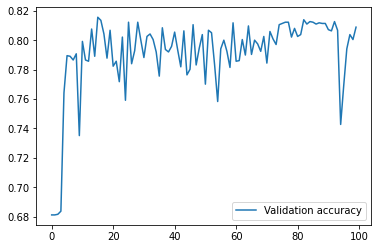

In [ ]:
import imageio
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 

score = model.evaluate(x_batch, y, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

import pandas as pd

hist_df = pd.DataFrame(H.history)
#a = hist_df.iloc[:, 2].to_numpy()
b = hist_df.iloc[:, 3].to_numpy()


#plt.plot(a, c='red',label='Validation loss')
plt.plot(b,label='Validation accuracy')
plt.legend()

In [ ]:
a = hist_df.iloc[:, 3].to_numpy()
a.mean()

0.7913243365287781

In [ ]:
%%capture
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('Promt7.ipynb')